## Powerlifting E1RM Estimator
This is a simple and straightfoward model I built that takes in the training data for each week on the big 3 lifts (squat bench and deadlift), and converts them to an estimate 1-rep max weight, then plots it onto an ongoing graph for myself to see trends in training.

/var/folders/92/8b71n6kj0h33ch61yv1mfqxw0000gn/T/ipykernel_53375/2968943312.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
/var/folders/92/8b71n6kj0h33ch61yv1mfqxw0000gn/T/ipykernel_53375/2968943312.py:52: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, week_df], ignore_index=True)


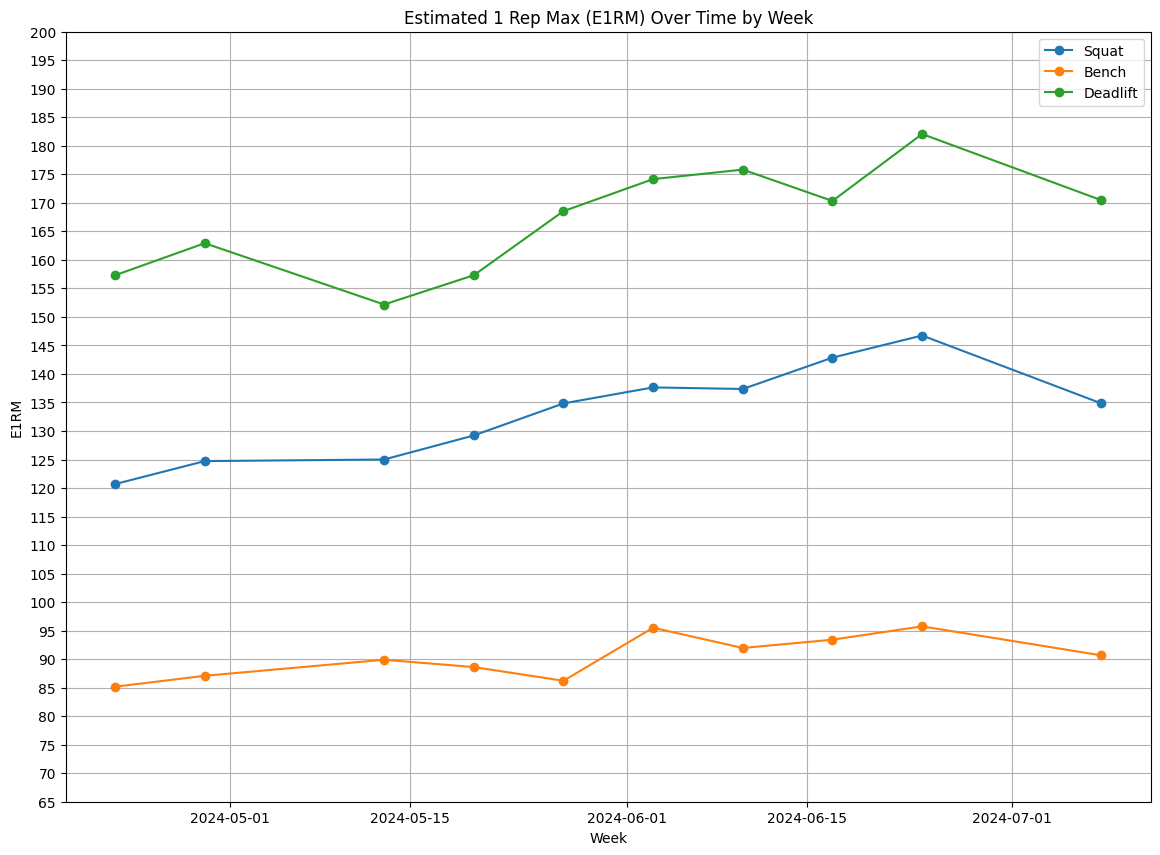

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

rpe_table = {
    10: [1.00, 0.96, 0.92, 0.89, 0.86, 0.84, 0.81, 0.79, 0.76, 0.74],
    9.5: [0.98, 0.94, 0.91, 0.88, 0.85, 0.82, 0.80, 0.77, 0.75, 0.72],
    9: [0.96, 0.92, 0.89, 0.86, 0.84, 0.81, 0.79, 0.76, 0.74, 0.71],
    8.5: [0.94, 0.91, 0.88, 0.85, 0.82, 0.80, 0.77, 0.75, 0.72, 0.69],
    8: [0.92, 0.89, 0.86, 0.84, 0.81, 0.79, 0.76, 0.74, 0.71, 0.68],
    7.5: [0.91, 0.88, 0.85, 0.82, 0.80, 0.77, 0.75, 0.72, 0.69, 0.67],
    7: [0.89, 0.86, 0.84, 0.81, 0.79, 0.76, 0.74, 0.71, 0.68, 0.65],
    6.5: [0.88, 0.85, 0.82, 0.80, 0.77, 0.75, 0.72, 0.69, 0.67, 0.64],
    6: [0.87, 0.84, 0.81, 0.79, 0.76, 0.74, 0.71, 0.68, 0.66, 0.63],
    5.5: [0.86, 0.83, 0.80, 0.78, 0.75, 0.73, 0.70, 0.67, 0.65, 0.62],
    5: [0.85, 0.82, 0.79, 0.77, 0.74, 0.72, 0.69, 0.66, 0.64, 0.61]
}

def calculate_e1rm(weight, reps, rpe):
    if rpe not in rpe_table or reps < 1 or reps > 10:
        raise ValueError("RPE must be between 5 and 10 and reps must be between 1 and 10")
    percentage = rpe_table[rpe][reps - 1]
    e1rm = weight / percentage
    return e1rm

df = pd.DataFrame(columns=['week', 'squat_weight', 'squat_reps', 'squat_rpe', 
                           'bench_weight', 'bench_reps', 'bench_rpe', 
                           'deadlift_weight', 'deadlift_reps', 'deadlift_rpe', 
                           'squat_e1rm', 'bench_e1rm', 'deadlift_e1rm'])

def add_weekly_data(date, squat_weight, squat_reps, squat_rpe, 
                    bench_weight, bench_reps, bench_rpe, 
                    deadlift_weight, deadlift_reps, deadlift_rpe):
    global df
    week_data = {
        'week': pd.to_datetime(date),
        'squat_weight': squat_weight,
        'squat_reps': squat_reps,
        'squat_rpe': squat_rpe,
        'bench_weight': bench_weight,
        'bench_reps': bench_reps,
        'bench_rpe': bench_rpe,
        'deadlift_weight': deadlift_weight,
        'deadlift_reps': deadlift_reps,
        'deadlift_rpe': deadlift_rpe,
        'squat_e1rm': calculate_e1rm(squat_weight, squat_reps, squat_rpe),
        'bench_e1rm': calculate_e1rm(bench_weight, bench_reps, bench_rpe),
        'deadlift_e1rm': calculate_e1rm(deadlift_weight, deadlift_reps, deadlift_rpe)
    }
    week_df = pd.DataFrame([week_data])
    df = pd.concat([df, week_df], ignore_index=True)

def plot_e1rm():
    global df
    plt.figure(figsize=(14, 10))
    
    plt.plot(df['week'], df['squat_e1rm'], marker='o', label='Squat')
    plt.plot(df['week'], df['bench_e1rm'], marker='o', label='Bench')
    plt.plot(df['week'], df['deadlift_e1rm'], marker='o', label='Deadlift')
    y_min = int(min(df[['squat_e1rm', 'bench_e1rm', 'deadlift_e1rm']].min()) - 20)
    y_max = int(max(df[['squat_e1rm', 'bench_e1rm', 'deadlift_e1rm']].max()) + 20)
    plt.yticks(np.arange(y_min, y_max, 5))
    plt.title('Estimated 1 Rep Max (E1RM) Over Time by Week')
    plt.xlabel('Week')
    plt.ylabel('E1RM')
    plt.legend()
    plt.grid(True)
    plt.show()

add_weekly_data("2024-04-22", 105, 1, 6, 77.5, 1, 7.5, 140, 1, 7)
add_weekly_data("2024-04-29", 111, 1, 7, 77.5, 1, 7, 145, 1, 7)
add_weekly_data("2024-05-13", 115, 1, 8, 80, 1, 7, 140, 1, 8)
add_weekly_data("2024-05-20", 115, 1, 7, 70, 4, 6, 140, 1, 7)
add_weekly_data("2024-05-27", 120, 1, 7, 75, 1, 6, 150, 1, 7)
add_weekly_data("2024-06-03", 122.5, 1, 7, 85, 1, 7, 155, 1, 7)
add_weekly_data("2024-06-10", 125, 1, 7.5, 80, 1, 6, 160, 1, 7.5)
add_weekly_data("2024-06-17", 130, 1, 7.5, 85, 1, 7.5, 155, 1, 7.5)
add_weekly_data("2024-06-24", 135, 1, 8, 90, 1, 8.5, 167.5, 1, 8)
add_weekly_data("2024-07-8", 120, 1, 7, 82.5, 1, 7.5, 150, 1, 6.5)

plot_e1rm()
